In [1]:
import pandas as pd
import matplotlib.pyplot as mp
import os

def get_newest_csv_file(dir_path):
    csv_files = []
    for file in os.listdir(dir_path):
        if file.endswith(".csv"):
            csv_files.append(file)
    if not csv_files:
        return None
    newest_csv_file = max(csv_files, key=os.path.getctime)
    return os.path.join(dir_path, newest_csv_file)

In [2]:
csv_file = get_newest_csv_file('/Users/heiko/Development/drasyl/')
print(csv_file)

/Users/heiko/Development/drasyl/WormholeSendChildChannelInitializer-43152.csv


In [3]:
df = pd.read_csv(csv_file)

# RFC 9293: Send Sequence Variables
df['Rel.SND.UNA'] = df['SND.UNA'] - df['ISS']
df['Rel.SND.NXT'] = df['SND.NXT'] - df['ISS']
df['Rel.SND.WL1'] = df['SND.WL1'] - df['IRS']
df['Rel.SND.WL2'] = df['SND.WL2'] - df['IRS']

# RFC 9293: Receive Sequence Variables
df['Rel.RCV.NXT'] = df['RCV.NXT'] - df['IRS']

df

,pid,time,SND.UNA,SND.NXT,SND.WND,SND.WL1,SND.WL2,ISS,RCV.NXT,RCV.WND,...,RTTVAR,SRTT,RTO,cwnd,ssthresh,Rel.SND.UNA,Rel.SND.NXT,Rel.SND.WL1,Rel.SND.WL2,Rel.RCV.NXT
0,43152,"Mon, 20 Mar 2023 05:08:21 +0100",1418092642,1418092642,91648,1341528573,1418092642,1418092641,1341528573,91648,...,16.500000,8.0,1000,3790,91648,1,1,1,76564070,1
1,43152,"Mon, 20 Mar 2023 05:08:22 +0100",1418092642,1418092642,91648,1341528573,1418092642,1418092641,1341528615,91606,...,37.125000,20.0,1000,3790,91648,1,1,1,76564070,43
2,43152,"Mon, 20 Mar 2023 05:08:22 +0100",1418092705,1418092705,91648,1341528573,1418092642,1418092641,1341528615,91606,...,33.093750,22.0,1000,3790,91648,64,64,1,76564070,43
3,43152,"Mon, 20 Mar 2023 05:08:22 +0100",1418098710,1418108318,89246,1341528615,1418098710,1418092641,1341528615,91606,...,32.479045,30.0,1000,9858,91648,6069,15677,43,76570138,43
4,43152,"Mon, 20 Mar 2023 05:08:22 +0100",1418127534,1418165966,89246,1341528615,1418127534,1418092641,1341528615,91606,...,22.800496,30.0,1000,38682,91648,34893,73325,43,76598962,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,43152,"Mon, 20 Mar 2023 05:09:29 +0100",1462762842,1462804641,90447,1341528615,1462762842,1418092641,1341528615,91606,...,1267.018452,643.0,5712,2464,22100,44670201,44712000,43,121234270,43
680,43152,"Mon, 20 Mar 2023 05:09:29 +0100",1462762842,1462804641,90447,1341528615,1462762842,1418092641,1341528615,91606,...,1267.018452,643.0,5712,2464,22100,44670201,44712000,43,121234270,43
681,43152,"Mon, 20 Mar 2023 05:09:30 +0100",1462762842,1462804641,90447,1341528615,1462762842,1418092641,1341528615,91606,...,1267.018452,643.0,5712,2464,22100,44670201,44712000,43,121234270,43
682,43152,"Mon, 20 Mar 2023 05:09:30 +0100",1462762842,1462804641,90447,1341528615,1462762842,1418092641,1341528615,91606,...,1267.018452,643.0,5712,2464,22100,44670201,44712000,43,121234270,43


# RFC 9293: Send Sequence Variables

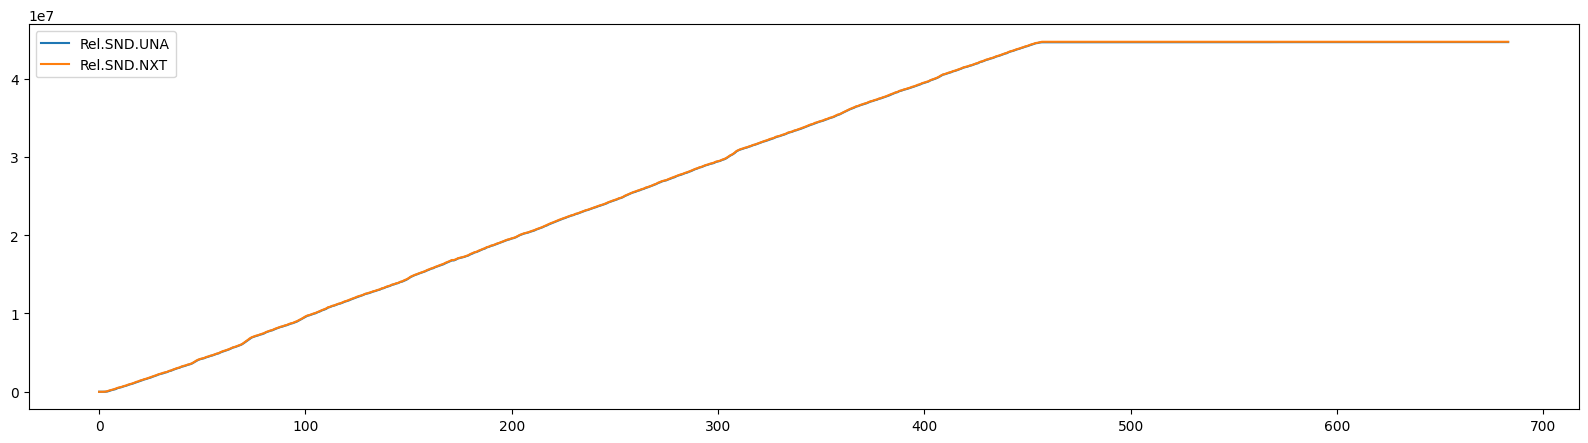

In [4]:
df.plot(y=['Rel.SND.UNA', 'Rel.SND.NXT'], figsize=(20, 5))
mp.show()

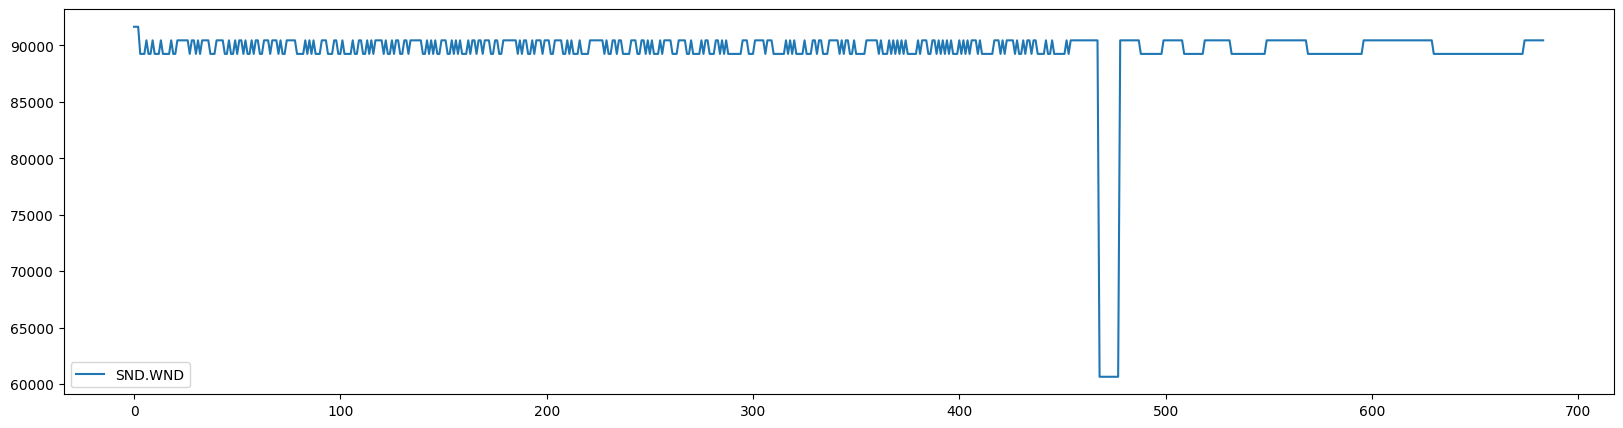

In [5]:
df.plot(y=['SND.WND'], figsize=(20, 5))
mp.show()

# RFC 9293: Receive Sequence Variables

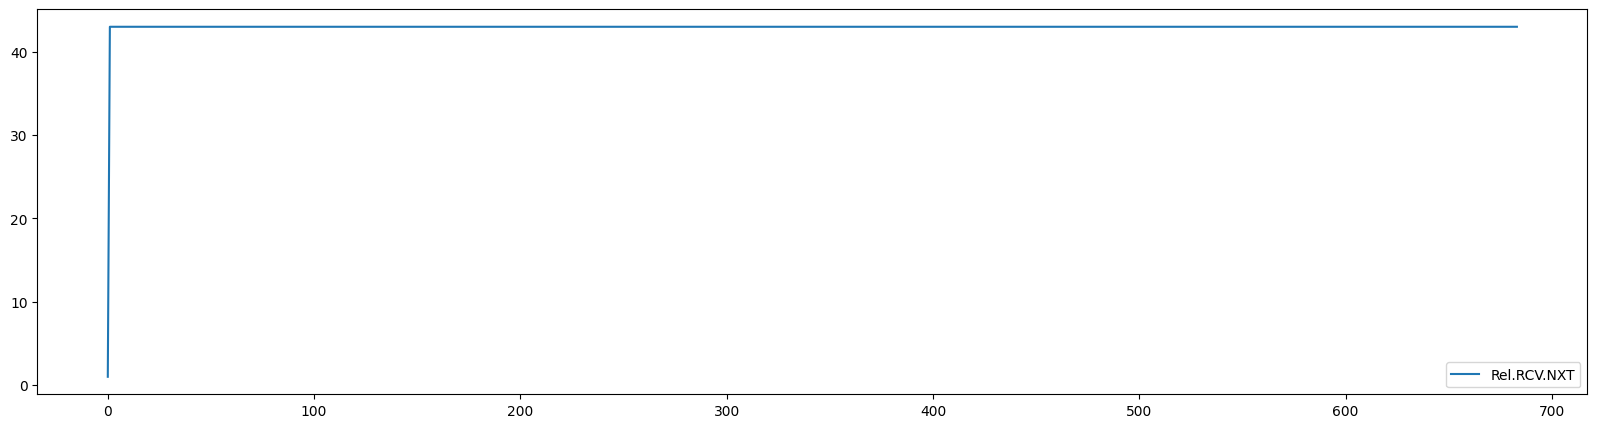

In [6]:
df.plot(y=['Rel.RCV.NXT'], figsize=(20, 5))
mp.show()

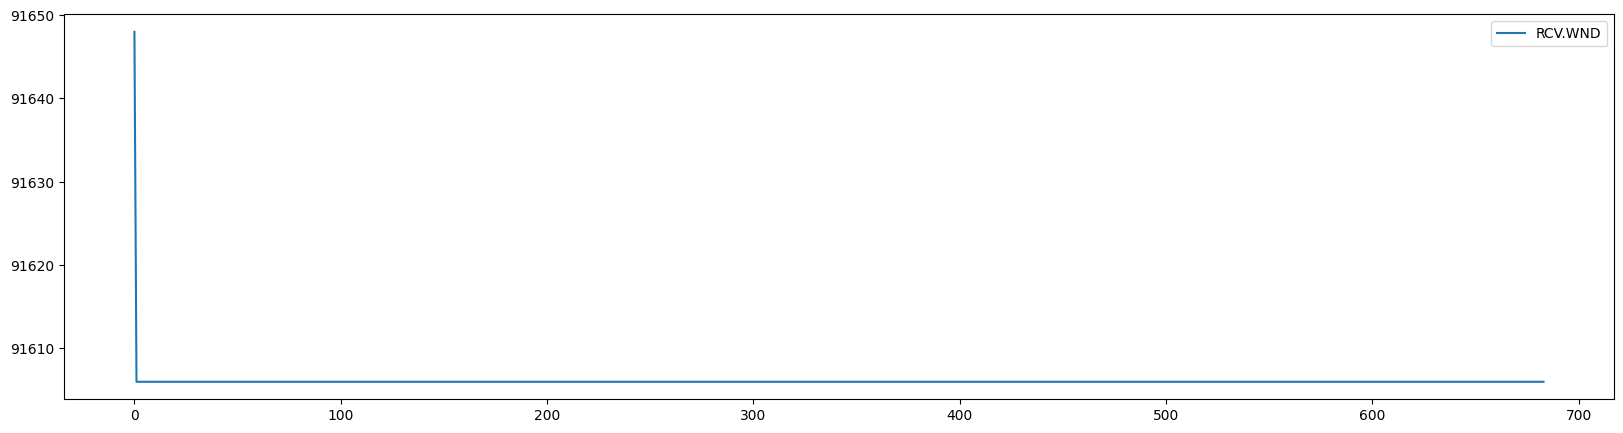

In [7]:
df.plot(y=['RCV.WND'], figsize=(20, 5))
mp.show()

# RFC 6298: Retransmission Timer Computation

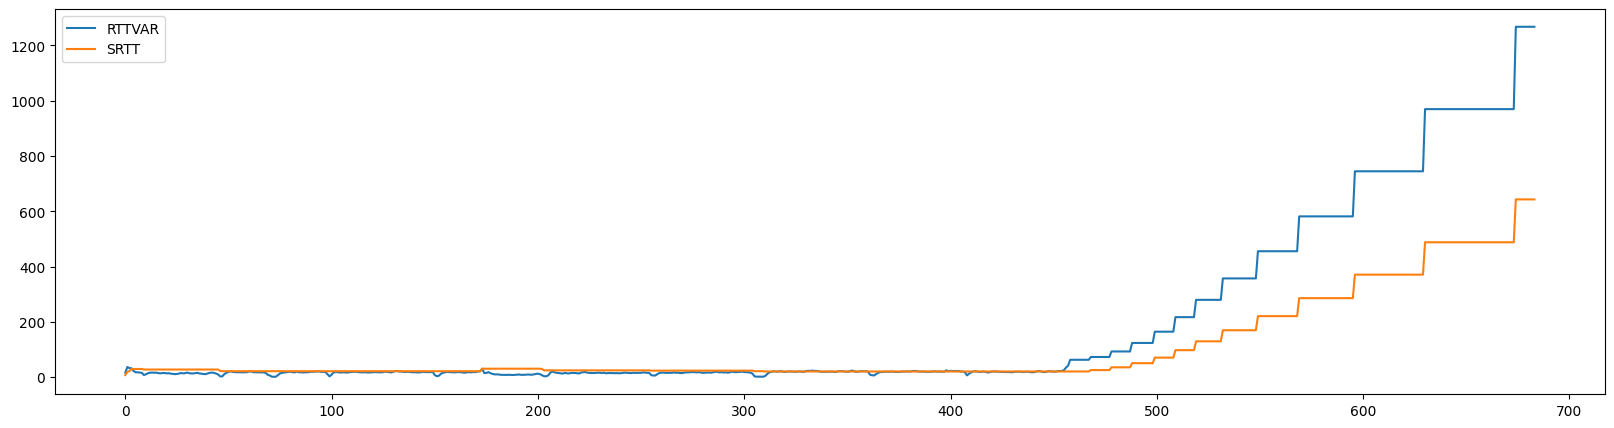

In [8]:
df.plot(y=['RTTVAR', 'SRTT'], figsize=(20, 5))
mp.show()

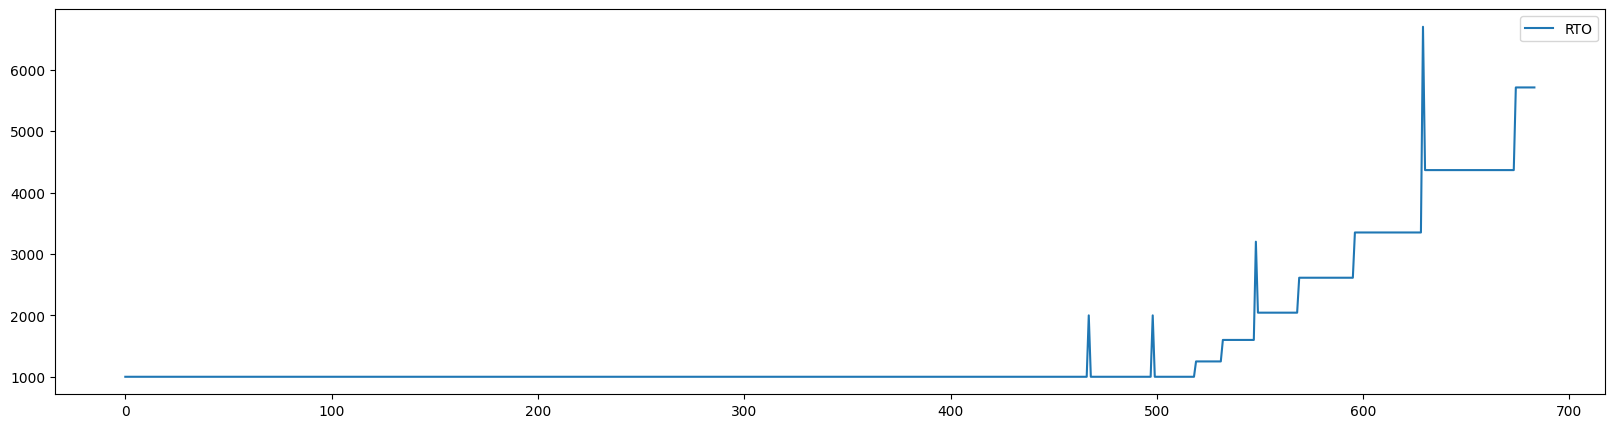

In [9]:
df.plot(y=['RTO'], figsize=(20, 5))
mp.show()

# RFC 5681: Congestion Control Algorithms

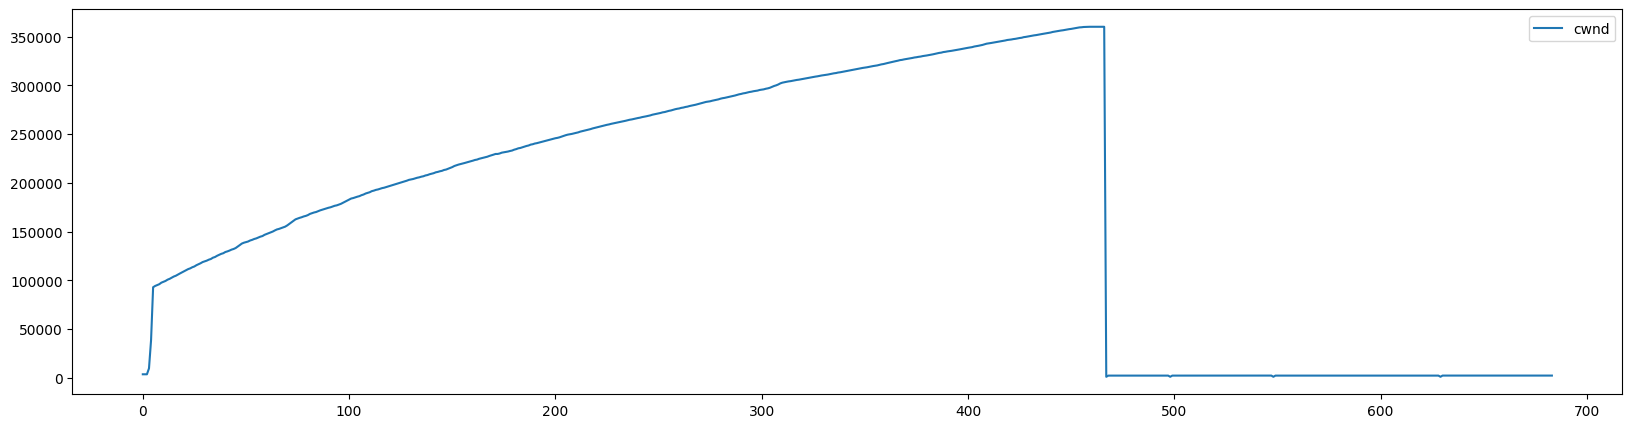

In [10]:
df.plot(y=['cwnd'], figsize=(20, 5))
mp.show()

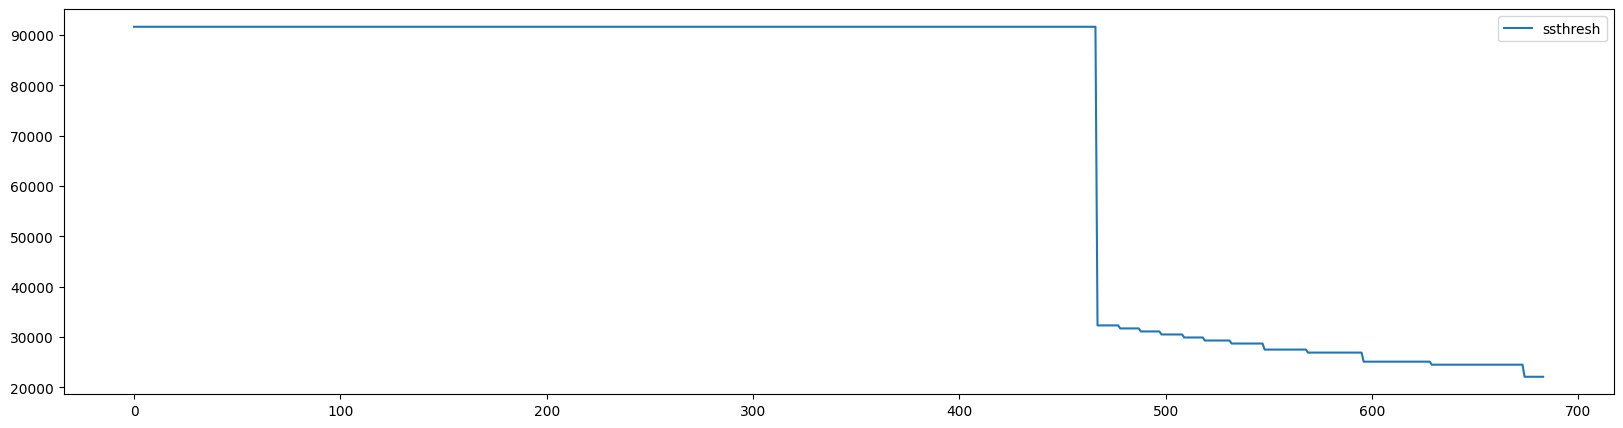

In [11]:
df.plot(y=['ssthresh'], figsize=(20, 5))
mp.show()

# Misc

<Axes: >

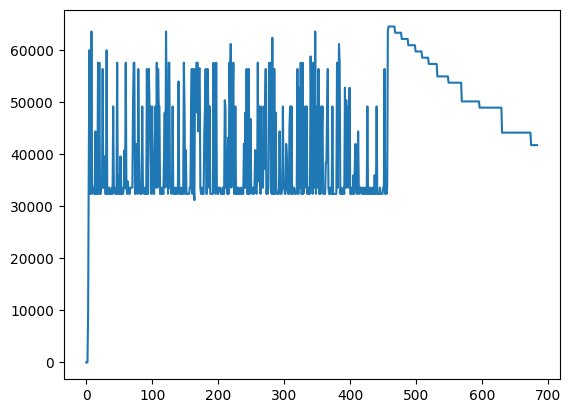

In [12]:
df['Unacknowledged Data'] = df['SND.NXT'] - df['SND.UNA']
df['Unacknowledged Data'].plot()